<div>
<h1>Приоритизация гипотез, АВ тест.</h1>  
    
<h2>Часть 1. Приоритизация гипотез.</h2>  
    
<a href='#1.0-bullet'>Ознакомление с данными, предобработка.Выводы</a>  
    
<h3>Задача</h3>  
    
<a href='#1.1-bullet'>Применение фреймворк ICE для приоритизации гипотез.</a>    
<a href='#1.2-bullet'>Применение фреймворк RICE для приоритизации гипотез.</a>   
<a href='#1.3-bullet'>Комментарии по приоритизации гипотез при применении RICE вместо ICE.</a>    

<h2>Часть 2. Анализ A/B-теста.</h2>  

<h3>Задача</h3>  
    
<a href='#2.1-bullet'>График кумулятивной выручки по группам. Выводы и предположения.</a>  
<a href='#2.2-bullet'>График кумулятивного среднего чека по группам. Выводы и предположения.</a>  
<a href='#2.3-bullet'>График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.</a>  
<a href='#2.4-bullet'>График кумулятивной конверсии по группам. Выводы и предположения.</a>  
<a href='#2.5-bullet'>График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.</a>  
<a href='#2.6-bullet'>Точечный график количества заказов по пользователям. Выводы и предположения.</a>  
<a href='#2.7-bullet'>Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы аномальных пользователей.</a>  
<a href='#2.8-bullet'>Точечный график стоимостей заказов. Выводы и предположения.</a>  
<a href='#2.9-bullet'>Расчет 95-й и 99-й перцентили стоимости заказов. Определение границы аномальных заказов.</a>  
<a href='#2.10-bullet'>Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.</a>  
<a href='#2.11-bullet'>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.</a>  
<a href='#2.12-bullet'>Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.</a>  
<a href='#2.13-bullet'>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.</a>  
<a href='#2.14-bullet'>График кумулятивной выручки по "очищенным" данным, по группам. Выводы</a>  
<a href='#2.15-bullet'>График кумулятивного среднего чека по "очищенным" данным, по группам. Выводы</a>  
<a href='#2.16-bullet'>График относительного изменения кумулятивного среднего чека группы B к группе A, по "очищенным" данным. Выводы</a>  
<a href='#2.17-bullet'>График кумулятивной конверсии по "очищенным" данным, по группам. Выводы</a>  
<a href='#2.18-bullet'>Принятие решения по результатам теста.</a>    
  
</div>

### Описание данных

#### Файл hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Файл orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

#### Файл visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a id = '1.0-bullet'></a>
### Ознакомление с данными, предобработка.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
pd.options.display.max_colwidth = 100

In [2]:
hypothesis = pd.read_csv('hypothesis.csv') 
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
orders = pd.read_csv('orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
#Проверим группы на пересечение пользователей
groupA = orders.query('group == "A"')
groupB = orders.query('group == "B"')
# найдем совподающих в группах пользователей
intersection_groups = groupA[groupA['visitorId'].isin(groupB['visitorId'])]
# найдем уникальных, совподающих пользователей 
intersection_groups_a = intersection_groups['visitorId'].drop_duplicates()

In [5]:
print('Количество пересечений между группами А и В {: } пользователей'.
      format(len(intersection_groups['visitorId'])))

print('Количество уникальных пользователей', len(orders['visitorId'].drop_duplicates()))

orders_not_intersecting = orders[np.logical_not(orders['visitorId'].isin(intersection_groups_a))]

print('Количество уникальных пользователей после удаления пересечений',
      len(orders_not_intersecting['visitorId'].drop_duplicates()))

print('Количество уникальных уникальных покупок',
      len(orders['transactionId'].drop_duplicates()))
print('Количество уникальных покупок после удаления пересечений',
      len(orders_not_intersecting['transactionId'].drop_duplicates()))

Количество пересечений между группами А и В  89 пользователей
Количество уникальных пользователей 1031
Количество уникальных пользователей после удаления пересечений 973
Количество уникальных уникальных покупок 1197
Количество уникальных покупок после удаления пересечений 1016


In [6]:
# столбц transactionId и visitorId к формату object;
convert_dict = {"transactionId": str, 
                "visitorId": str} 
  
orders = orders.astype(convert_dict) 

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   object        
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Вывод
1. Данные в файлах подобранны без пропусков, с корректными типами данных. Провели незначительную подработку для удобства дельнейшей работы.
2. При проверке пользователей на пересечение, обнаружили пересекающихся пользователей в группах, при этом покупки у них уникальные. Это похоже на ошибку учета пользователей во время проведения теста. Раз покупка не повторяется, то оснований удалять ее нет, возможно клиент заходил с разных устройств. Конечно не совсем понятно, что в результате оказывает большее влияние на принятие решения о покупке: вариант сайта А или В, тем не менее оставим эти данные что бы не потерять данные по конвертации. Сообщим коллегам об это баге.

## Часть 1. Приоритизация гипотез.

<a id = '1.1-bullet'></a>
### Примененим фреймворк ICE и RICE для приоритизации гипотез
Приоритизация рассчитывается по формулам:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [10]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'] 
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(1)


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


<a id = '1.2-bullet'></a>
### Применение фреймворк RICE для приоритизации гипотез.

In [11]:
hypothesis['RICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']) / hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id = '1.3-bullet'></a>
### Комментарии по приоритизации гипотез при применении RICE вместо ICE.

#### фреймворк ICE 
Мы получили тройку лидеров:  
8, 0 и 7 гипотизы, связанно это с высокими показателями Impact и Confidence и с относительно низким Efforts.

#### фреймворк RICE 
Мы получили тройку лидеров:  
7, 2 и 0 гипотизы, связанно это с тем, что в числитель дроби добавляется Reach к Impact и Confidence, при том, что в знаменателе так и остается одно значение Efforts.  
Далее мы видим, что в тройки лидеров RICE  сохранизись гипотезы ICE 0 и 7 но при этом у них изменился приоритет у 7 - повысился, у 0 - понизился. Что объясняется тем, что сумма значений (Reach, Impact, Confidence) у 7 гипотезы больше чем у 0 при относительно равном Efforts.  

Мне видится другая проблема, при расчетах приоритизации гипотез, это присвоение значений важности параметрам. В этих параметрах много субъективных оценок.

## Часть 2. Анализ A/B-теста.

<a id = '2.1-bullet'></a>
### График кумулятивной выручки по группам. Выводы и предположения.

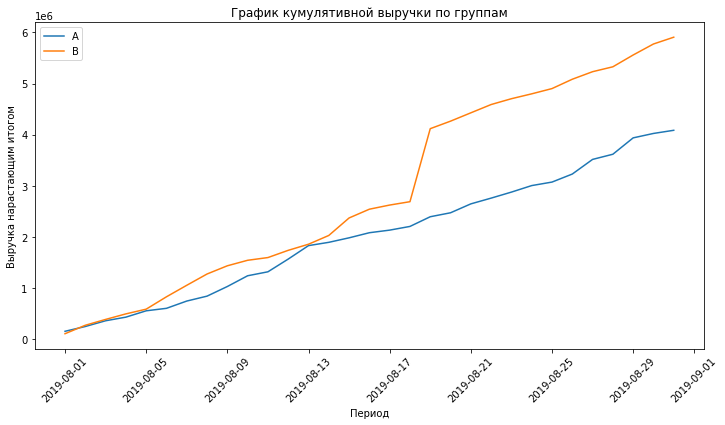

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Агрегируем значения. Вычислим максимальную дату. 
#Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:  
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
      'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])     

#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:  
visitorsAggregated = datesGroups.apply(lambda x: 
                                       visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                               visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                        .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Разворот подписей оси х на 45 градусов
plt.xticks(rotation = 45) 

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title ('График кумулятивной выручки по группам')
plt.xlabel('Период')
plt.ylabel('Выручка нарастающим итогом')
plt.legend()
plt.show()

### Вывод
В середине теста, сегмент В вырвался вперед  и продолжает лидировать весь остаток теста. Похоже, что анамально большой заказ. Проверим средний чек.

<a id = '2.2-bullet'></a>
### График кумулятивного среднего чека по группам. Выводы и предположения.

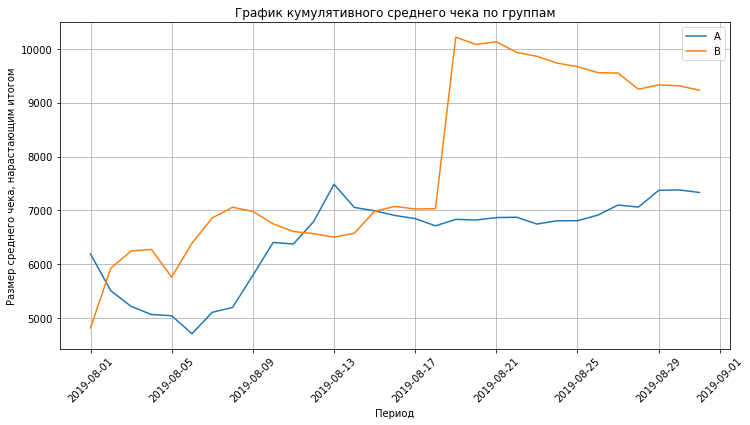

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation = 45) 
plt.grid()
plt.title ('График кумулятивного среднего чека по группам')
plt.xlabel('Период')
plt.ylabel('Размер среднего чека, нарастающим итогом')
plt.legend()
plt.show()

### Вывод 
Куммулятивное значение среднего чека нестабильно. На графике отчетливо виден выброс в группе В и после, видим отчетливое снижение среднего чека в группе В. Решение принимаить по таким данным нельзя, необходимо отчистить данные от вбросов.

<a id = '2.3-bullet'></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.

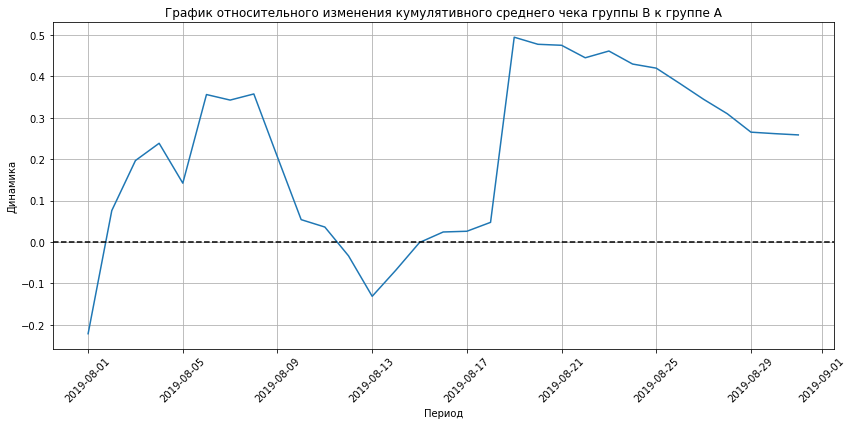

In [14]:
# кумулятивная метрика группы B / кумулятивная метрика группы A - 1.
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (14, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']
                                           /mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']
           /mergedCumulativeRevenue['ordersA'])-1)

plt.xticks(rotation = 45) 
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title ('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Период')
plt.ylabel('Динамика')
plt.show()

### Выводы
Динамика графика резко меняется в середине, вначале падение, затем рост. Видимо в даты этих измененй и совершались аномальные заказы.

<a id = '2.4-bullet'></a>
### График кумулятивной конверсии по группам. Выводы и предположения.

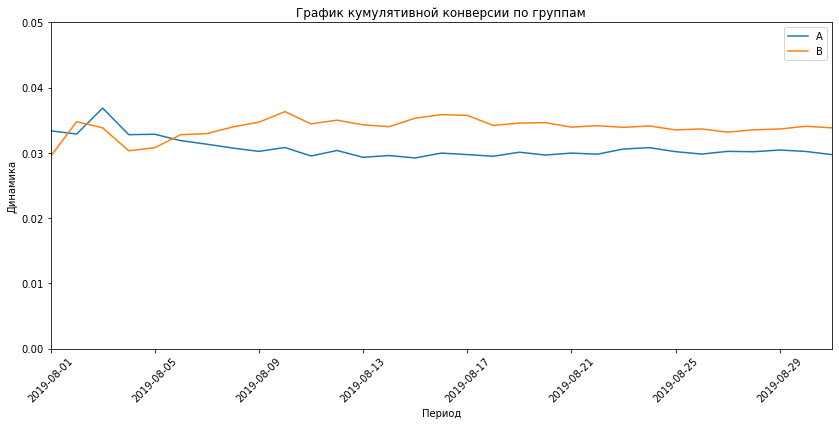

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (14, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

plt.xticks(rotation = 45) 
plt.title ('График кумулятивной конверсии по группам')
plt.xlabel('Период')
plt.ylabel('Динамика')
plt.show()

#### Вывод
Мы видим, что конверсия обоих групп выравнивается уже в первой половине теста. Конверсмя группы В стабильно больше группы А.

<a id = '2.5-bullet'></a>
### График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения

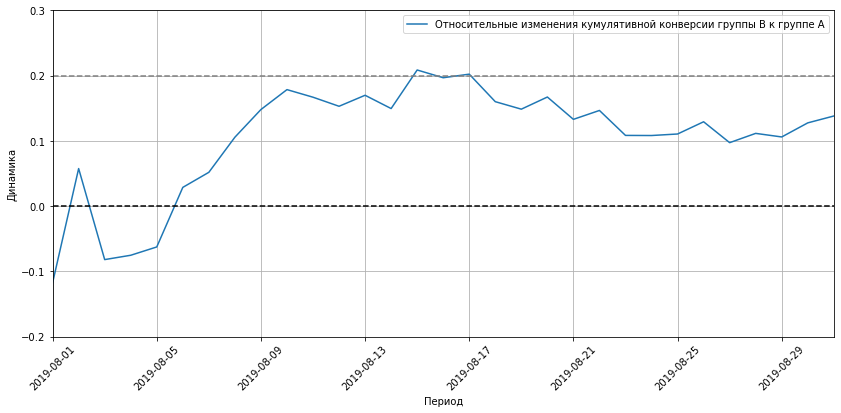

In [16]:
# Объедините таблицы cumulativeDataA и cumulativeDataB методом merge()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])

#Построим график относительно различия кумулятивной конверсии группы B к группе A.
plt.figure(figsize = (14, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, 
         label="Относительные изменения кумулятивной конверсии группы B к группе A")

plt.xticks(rotation = 45) 
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])


plt.xlabel('Период')
plt.ylabel('Динамика')
plt.show()

### Вывод
Группа В лидирует по конверсии, хотя во второй половине периода мы наблюдаем снижение конверсии на 10% и в конце периода снова рост относительно группы А. Думаю это можно считать стабильным положительным результатом лучшей конверсии группы В относительно группы А.

<a id = '2.6-bullet'></a>
### Точечный график количества заказов по пользователям. Выводы и предположения.

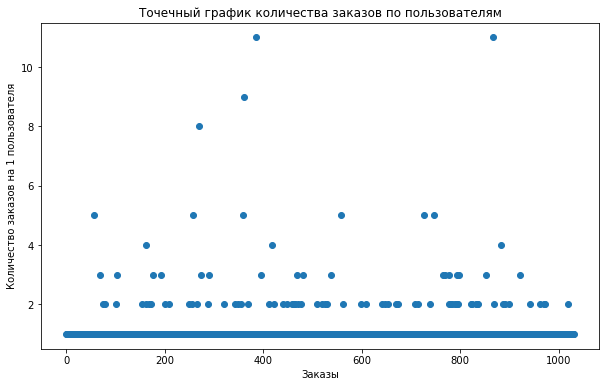

In [17]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']
# Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize = (10, 6))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title ('Точечный график количества заказов по пользователям')
plt.xlabel('Заказы')
plt.ylabel('Количество заказов на 1 пользователя')
plt.show()

#### Выводы
Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-5 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

<a id = '2.7-bullet'></a>
### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы аномальных пользователей.

In [18]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя.
np.percentile(ordersByUsers['orders'], [90, 95, 99])


array([1., 2., 4.])

### Выводы
Не более 5% пользователей оформляли больше чем 2 заказа, и только 1% пользователей делают более 4 заказов. Логично  выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

<a id = '2.8-bullet'></a>
### Точечный график стоимостей заказов. Выводы и предположения.

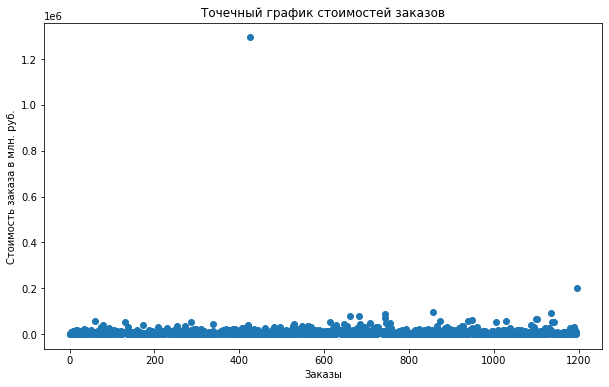

In [19]:
plt.figure(figsize = (10, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title ('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа в млн. руб.')
plt.show()

### Вывод
Мы видим что в данных о заказах есть заказы со стоимостью более 1,2 млн, 200 тыс., но основная масса заказов ниже 100 тыс. руб. 

<a id = '2.9-bullet'></a>
### Расчет 95-й и 99-й перцентили стоимости заказов. Определение границы аномальных заказов.

In [20]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

### Вывод
Мы видем, что не более 5% заказов дороже 28000 руб, и не более 1% заказов дороже 58233 руб. Логично  выбрать заказы стоимостью 28000 руб. за нижнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

<a id = '2.10-bullet'></a>
### Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.

In [21]:
import scipy.stats as stats
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [22]:
# Создадим переменные ordersByUsersA и ordersByUsersB/
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать 
# количество заказов.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                            .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                            .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                        - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
                                                        - len(ordersByUsersB['orders'])), name='orders')],axis=0)


**Нулевая гипотеза** - статистически значимых различий в конверсии между группами, по «сырым» данным **нет**.  
**Альтарнативная гипотеза** - статистически значимые различия в конверсии между группами, по «сырым» данным **есть**.  

In [23]:
alpha = .05 

results = stats.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()    
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы В к конверсии группы А: {0:.2%}".format(sampleB.mean()/sampleA.mean()-1))

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу

p-value: 0.008
Относительный прирост конверсии группы В к конверсии группы А: 13.81%


### Вывод
Статистически значимые различия в конверсии между группами есть, Нулевую гипотезу отвергаем. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%

<a id = '2.11-bullet'></a>
### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

In [24]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное различие среднего чека между группами: {0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value: 0.365
Относительное различие среднего чека между группами: 25.87%


### Вывод
p-value болльше 0,05 - статистически значимых различий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами  25.9% 

<a id = '2.12-bullet'></a>
### Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

In [25]:
# 
# Сделаем срезы пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
# срезы пользователей, совершивших заказы дороже 28 000 руб. 
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
# Объедините их в таблице abnormalUsers, удалите дубликаты, отсортируйте по возрастанию.
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders']
,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders']
,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)



**Нулевая гипотеза** - статистически значимых различий в конверсии между группами по «очищенным» данным **нет**.  
**Альтарнативная гипотеза** - статистически значимые различия в конверсии между группами по «очищенным» данным **есть**.  

In [26]:
alpha = .05 

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()    
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("относительный прирост конверсии между очищенными группами: {0:.2%}"
      .format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)))

p-значение:  0.006521296371518379
Отвергаем нулевую гипотезу

p-value: 0.00652
относительный прирост конверсии между очищенными группами: 17.27%


### Вывод
Как и в случае с сырыми данными статистически значимые различия в конверсии групп имеется, группы равны не равны. Так же мы наблюдаем рост конверсии с 13% до 17%.

<a id = '2.13-bullet'></a>
### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

In [27]:

print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("относительный прирост среднего чека в очищенных группах: {0:.2%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


p-value: 0.369
относительный прирост среднего чека в очищенных группах: -1.96%


### Вывод
P-value увеличился, различия в среднем чеке снизилось с 26% до -2%.

<a id = '2.14-bullet'></a>
### График кумулятивной выручки по "очищенным" данным, по группам.

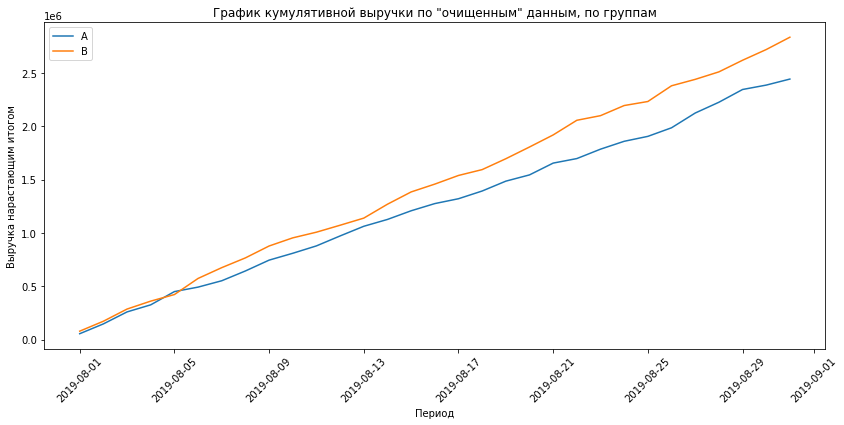

In [28]:
#исключим выбросы из orders
orders_good = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# создаем массив уникальных пар значений дат и групп теста
datesGroups_good = orders_good[['date','group']].drop_duplicates()

#Агрегируем значения. Вычислим максимальную дату. 
#Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:  
ordersAggregated_good = datesGroups_good.apply(lambda x: orders_good[np.logical_and(orders_good['date'] <= x['date'],
                                                                     orders_good['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
      'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])     

#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:  
visitorsAggregated_good = datesGroups_good.apply(lambda x: 
                                       visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                               visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                        .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData_good = ordersAggregated_good.merge(visitorsAggregated_good, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_good.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_g = cumulativeData_good[cumulativeData_good['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_g = cumulativeData_good[cumulativeData_good['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (14, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA_g['date'], cumulativeRevenueA_g['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB_g['date'], cumulativeRevenueB_g['revenue'], label='B')

plt.xticks(rotation = 45) 
#plt.grid()
plt.title ('График кумулятивной выручки по "очищенным" данным, по группам')
plt.xlabel('Период')
plt.ylabel('Выручка нарастающим итогом')
plt.legend()
plt.show()

### Вывод
Мы видим, что группа В уже с самого начала занимаеет лидирующие позиции, к тому же, в связи с отсутсутствием "скачка", эти данные выглядят более убидительно.

<a id = '2.15-bullet'></a>
### График кумулятивного среднего чека по "очищенным" данным, по группам.

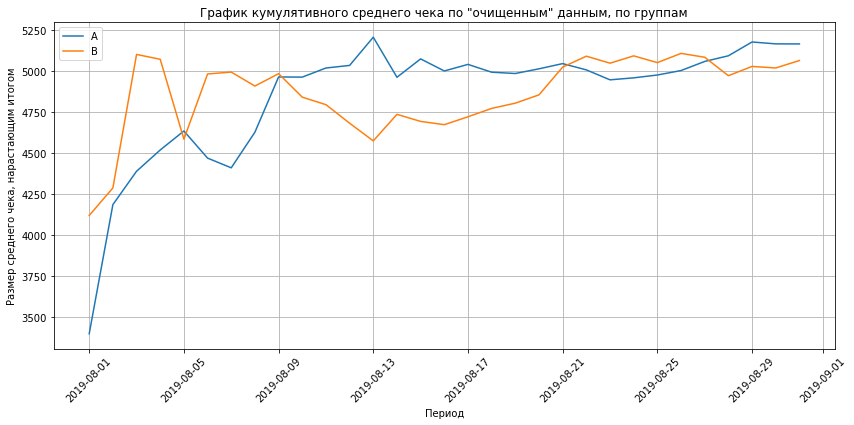

In [29]:
plt.figure(figsize = (14, 6))
plt.plot(cumulativeRevenueA_g['date'], cumulativeRevenueA_g['revenue']/cumulativeRevenueA_g['orders'], label='A')
plt.plot(cumulativeRevenueB_g['date'], cumulativeRevenueB_g['revenue']/cumulativeRevenueB_g['orders'], label='B')
plt.xticks(rotation = 45) 
plt.grid()
plt.title ('График кумулятивного среднего чека по "очищенным" данным, по группам')
plt.xlabel('Период')
plt.ylabel('Размер среднего чека, нарастающим итогом')
plt.legend()
plt.show()

### Вывод
Мы видим, что группы "поочередно занимают лидирующие позиции" по размеру чреднего чека, причем эта динамика сохраняется весь период наблюдений.

<a id = '2.16-bullet'></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A, по "очищенным" данным

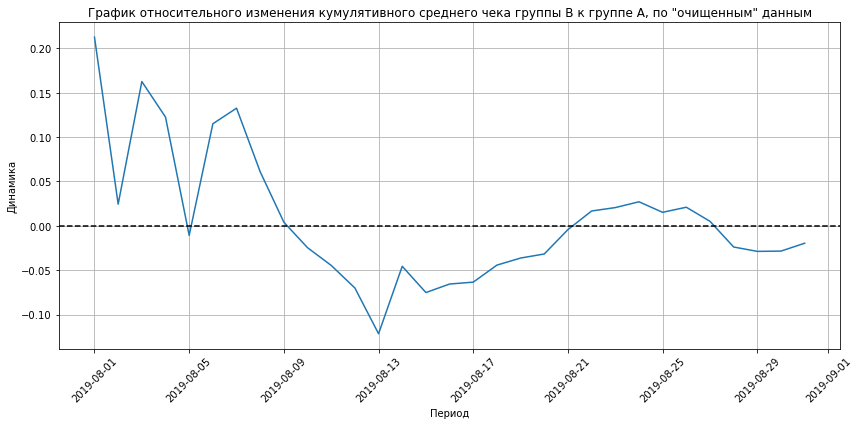

In [30]:
# кумулятивная метрика группы B / кумулятивная метрика группы A - 1.
# собираем данные в одном датафрейме
mergedCumulativeRevenue_good = cumulativeRevenueA_g.merge(cumulativeRevenueB_g, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (14, 6))
plt.plot(mergedCumulativeRevenue_good['date'], (mergedCumulativeRevenue_good['revenueB']
                                           /mergedCumulativeRevenue_good['ordersB'])
         /(mergedCumulativeRevenue_good['revenueA']
           /mergedCumulativeRevenue_good['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation = 45) 
plt.grid()
plt.title ('График относительного изменения кумулятивного среднего чека группы B к группе A, по "очищенным" данным')
plt.xlabel('Период')
plt.ylabel('Динамика')
plt.show()

### Вывод
Этот график отражает и подтверждает динамику среднего чека группы В относительно группы А.

<a id = '2.17-bullet'></a>
### График кумулятивной конверсии по "очищенным" данным, по группам.

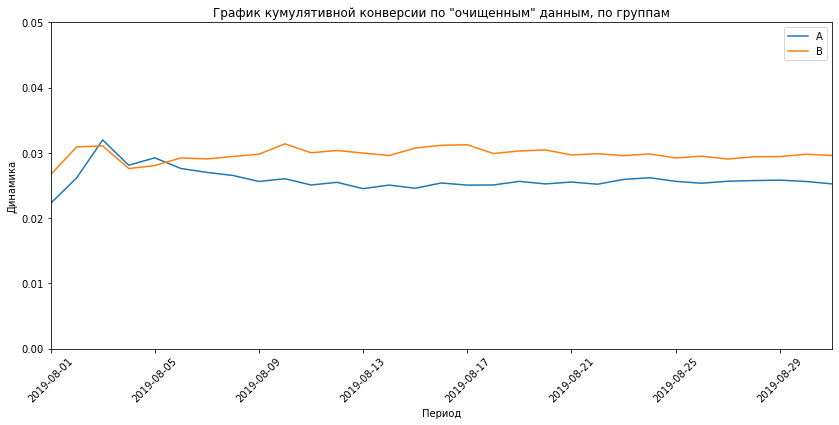

In [31]:
# считаем кумулятивную конверсию
cumulativeData_good['conversion'] = cumulativeData_good['orders']/cumulativeData_good['visitors']
# отделяем данные по группе A
cumulativeDataA_g = cumulativeData_good[cumulativeData_good['group']=='A']
# отделяем данные по группе B
cumulativeDataB_g = cumulativeData_good[cumulativeData_good['group']=='B']

# строим графики
plt.figure(figsize = (14, 6))
plt.plot(cumulativeDataA_g['date'], cumulativeDataA_g['conversion'], label='A')
plt.plot(cumulativeDataB_g['date'], cumulativeDataB_g['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

plt.xticks(rotation = 45) 
#plt.grid()
plt.title ('График кумулятивной конверсии по "очищенным" данным, по группам')
plt.xlabel('Период')
plt.ylabel('Динамика')
plt.show()

In [32]:
# количество пользователей с заказами больше 2х.
usersWithManyOrders.shape

(24,)

### Вывод
Как мы видим, этот график не отличается от предыдущего графика(конверсии по сырым данным), что и логично, т.к. размер среднего чека на него не влияет, а количество пользователей с заказами больше 2х (которые были удалены) всего 24 человека.

<a id = '2.18-bullet'></a>
### Принятие решения по результатам теста.

### Выводы:

1. При подработке данных был выявлена ошибка в сборе данных: 56 пользователей повторяются в обоих группах (в  количестве 89 записей), при этом покупки у них уникальные, не повторяющиеся. 

2. Пременив фреймворк  RICE для приоритизации гипотез мы получили следующие гипотизы для реализации:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

3. Конверсия
В ходе нашего анализа(с использованием непараметрического теста Уилкоксона-Манна-Уитни)  подтвердились статестически значимые различия между конверсиями в продажу в группах. Это видно и на графиках. Можно одназначно утверждать, что посетиели группы В эффективнее конвертируются в продажи чем группы А.

4. Средний чек
А вот различий в среднем чеке в группах не выявленно, возможно это связано с ассортиментом магазина. 

5. Выручка
Как мы видим на графиках выручка группы В выше чем в группе А. Что и логично, т.к. чистота покупоп в группе В выше, и даже при равном среднем чеке группа В принесет больше выручки чем группа А. 

#### Итог:
**Остановить тест, зафиксировать победу группы В**  

